<a href="https://colab.research.google.com/github/ammobam/Display_SensorData/blob/main/210727_%EB%82%98%EB%AC%B4%ED%94%8C%EB%9E%98%EB%8B%9B_%EB%94%94%EC%8A%A4%ED%94%8C%EB%A0%88%EC%9D%B4_%EC%84%BC%EC%84%9C%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 디스플레이 생산라인 센서 데이터 분석

## 주제 : 불량품에 영향을 주는 요인 찾기
- 결과 : "ㅇㅇ센서에서 ㅁㅁ면 불량품"
1. 주요 요인 피처 5개 추출
2. 불량품/양품 구분하는 모델도 찾아야 함


- 머신러닝 이용


In [ ]:
# 데이터 불러오기
import pandas as pd
df_origin = pd.read_csv('/content/drive/MyDrive/나무플래닛/1. 데이터_디스플레이/factory_glass_2016.zip', encoding='cp949')
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145 entries, 0 to 8144
Columns: 841 entries, dat...date.name. to R.Vac
dtypes: float64(834), int64(6), object(1)
memory usage: 52.3+ MB


In [ ]:
# 컬럼명 리스트 만들기
col_origin = df_origin.columns
col_origin

'dat...date.name.'

In [ ]:
# 컬럼명 확인
col_origin[:-10]

Index(['dat...date.name.', 'LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101',
       'LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102',
       'LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103', 'LEHR.DRV.MTR..M4.1.SPD.1WSI40104',
       'LEHR.DRV.MTR..M4.2.SPD.1WSI40105', 'LEHR.DRV.MTR..M5.1.SPD.1WSI40106',
       'LEHR.DRV.MTR..M5.2.SPD.1WSI40107', 'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M6.2.SPD.1WSI40109',
       ...
       'STD_U_L', 'STD_U_R', 'STD_L_L', 'STD_L_R', 'STD_GLS_L', 'STD_GLS_R',
       '투입.LEFT.', '투입.RIGHT.', 'ROLLDOWN.폐기.LEFT.', '진공패드.폐기.LEFT.'],
      dtype='object', length=831)

In [ ]:
# 컬럼이름을 리스트로 변환
name_list = col_origin.tolist()

name_list_10=[]
for name in name_list:
    name = str(name)[:10]
    name_list_10.append(name)
name_list_10

In [119]:
# 컬럼명(10글자)을 키, 각 컬럼의 인덱스를 값으로 하는 딕셔너리 생성
# 이렇게 하면 컬럼명 앞 10글자가 겹치는 컬럼의 인덱스를 모아 볼 수 있으므로
# 이름이 유사한 컬럼 집단의 개수, 각 집단에 속하는 컬럼의 수를 파악하기 쉬워짐

# 빈 딕셔너리 생성
name_dict = {}

# 인덱스, 컬럼이름에 대해 반복
for index, key in enumerate(name_list_10):
    
    # 만약 key가 딕셔너리에 없으면 키, 인덱스 생성
    if key not in name_dict:
        name_dict[key] = [index]
        # 딕셔너리에 넣을 때 int가 아닌 list로 넣어야 함
    # 만약 key가 딕셔너리에 있으면 인덱스 추가
    else :
        name_dict[key].append(index)

# 확인
name_dict
name_dict.keys()
#name_dict.items()

dict_keys(['dat...date', 'LIFT.OUT.R', 'LEHR.DRV.M', 'DRIVE.MOTO', 'X1WOS45101', 'X1WOS45102', 'X1WOS45103', 'X1WOS45104', 'X1WOS45105', 'X1WOS45106', 'X1WOS45107', 'X1WOS45108', 'X1WOS45109', 'X1WOS45110', 'DCS_Offset', 'DAMP.POSIT', 'DB.N2.SCRE', 'N2.TO.EA13', 'ROOF.HEATI', 'ATM.FLOW.S', 'SEC11.N2.1', 'SEC11.N2.H', 'cluster', 'ML.Speed', 'Ribbon.Spe', 'Gross.widt', 'Left.edge', 'Right.edge', 'UPPER.AB1.', 'LOWER.AB1.', 'UPPER.AB2.', 'LOWER.AB2.', 'UPPER.AB3.', 'LOWER.AB3.', 'UPPER.AB4.', 'LOWER.AB4.', 'UPPER.AB5.', 'LOWER.AB5.', 'UPPER.AB6.', 'LOWER.AB6.', 'UPPER.AB7.', 'LOWER.AB7.', 'UPPER.AB8.', 'LOWER.AB8.', 'UPPER.AB9.', 'LOWER.AB9.', 'UPPER.AB10', 'LOWER.AB10', 'UPPER.AB11', 'LOWER.AB11', 'UPPER.C1..', 'LOWER.C1..', 'UPPER.C2..', 'LOWER.C2..', 'UPPER.C3..', 'LOWER.C3..', 'UPPER.C4..', 'LOWER.C4..', 'UPPER.RET.', 'TMP.GLASS.', 'TMP.TIN..B', 'X.10.BAY.L', 'X.10.BAY.R', 'X.1.BAY.LE', 'X.1.BAY.RI', 'X.7.BAY.LE', 'X.7.BAY.RI', 'X.1.LEHR.S', 'X.1.LEHR.O', 'X.2.LEHR.S', 'X.2.LEHR.O', '

In [79]:
# 컬럼 집단의 수 : 246개
len(name_dict)

246

## 각 컬럼집단의 상관관계 확인

In [ ]:
# 'ATM.FLOW.S' 로 시작하는 컬럼 간의 상관계수 확인하기
## 만약 이름이 유사한 컬럼 간 종속성이 높다면
## 해당 컬럼 집단에서 하나만 골라 대표로 하고 전체 데이터에 대해 상관계수를 확인할 것

# 'ATM.FLOW.S' 컬럼 인덱스 리스트
col_atm = name_dict['ATM.FLOW.S']

# 데이터에서 해당 컬럼만 추출하여 저장하기
df = df_origin.iloc[:, col_atm]
df.info()

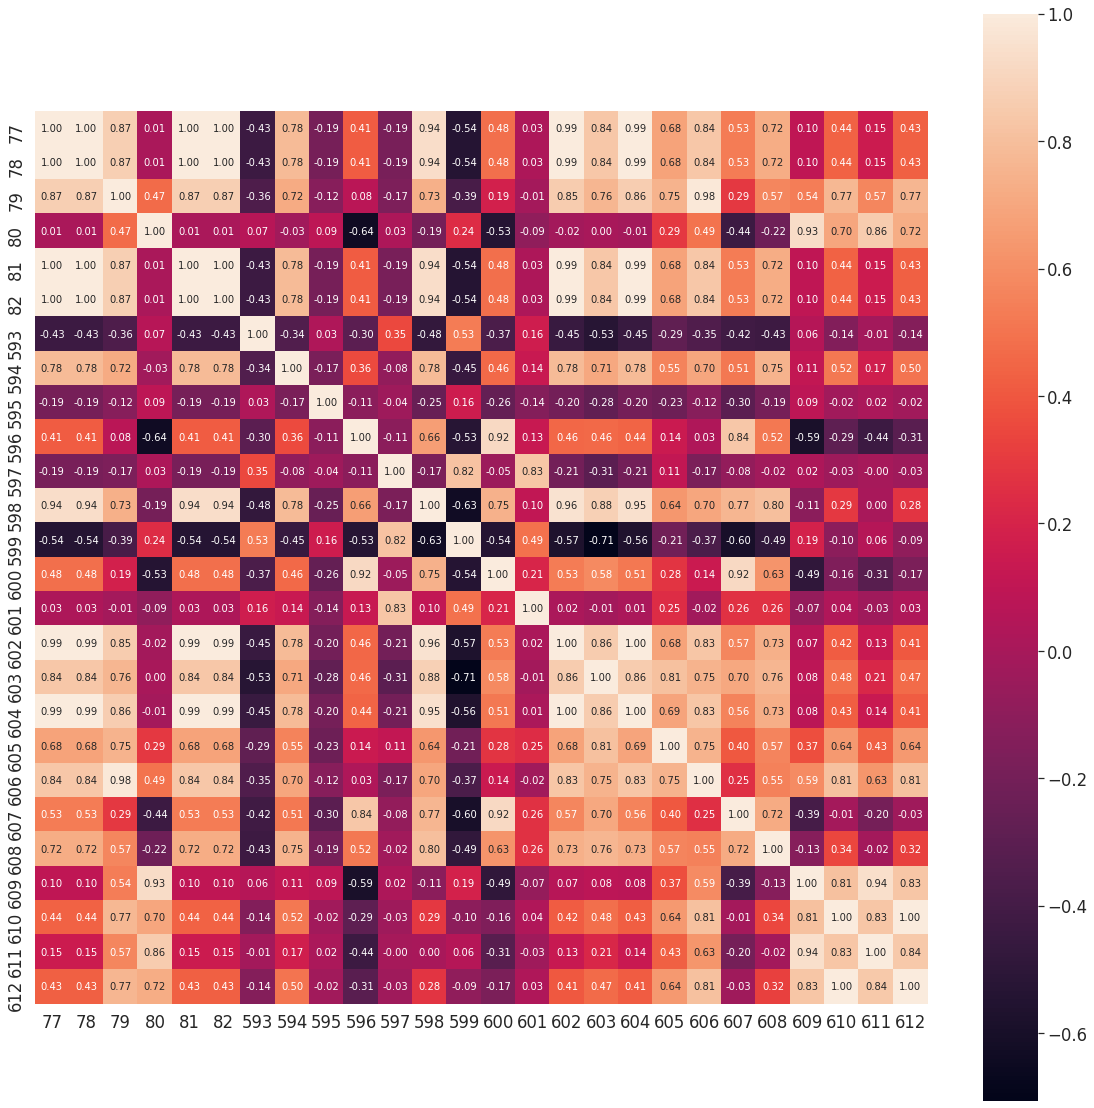

In [109]:
# 상관계수 데이터프레임을 배열로 저장
corr_array = df.corr().to_numpy()
#print(corr_array.shape)    # (26,26)

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.set(font_scale=1.5)
sns.heatmap(corr_array, cbar=True, square=True, fmt='.2f', annot=True,
           annot_kws={'size':10}, yticklabels=col_atm, xticklabels=col_atm)
plt.show()

## 결과 정리
### 'ATM.FLOW.S'
- 00, 500, 600 번대 센서데이터... 상관관계는 높은데 대표할만한 값 추리기가 어려움


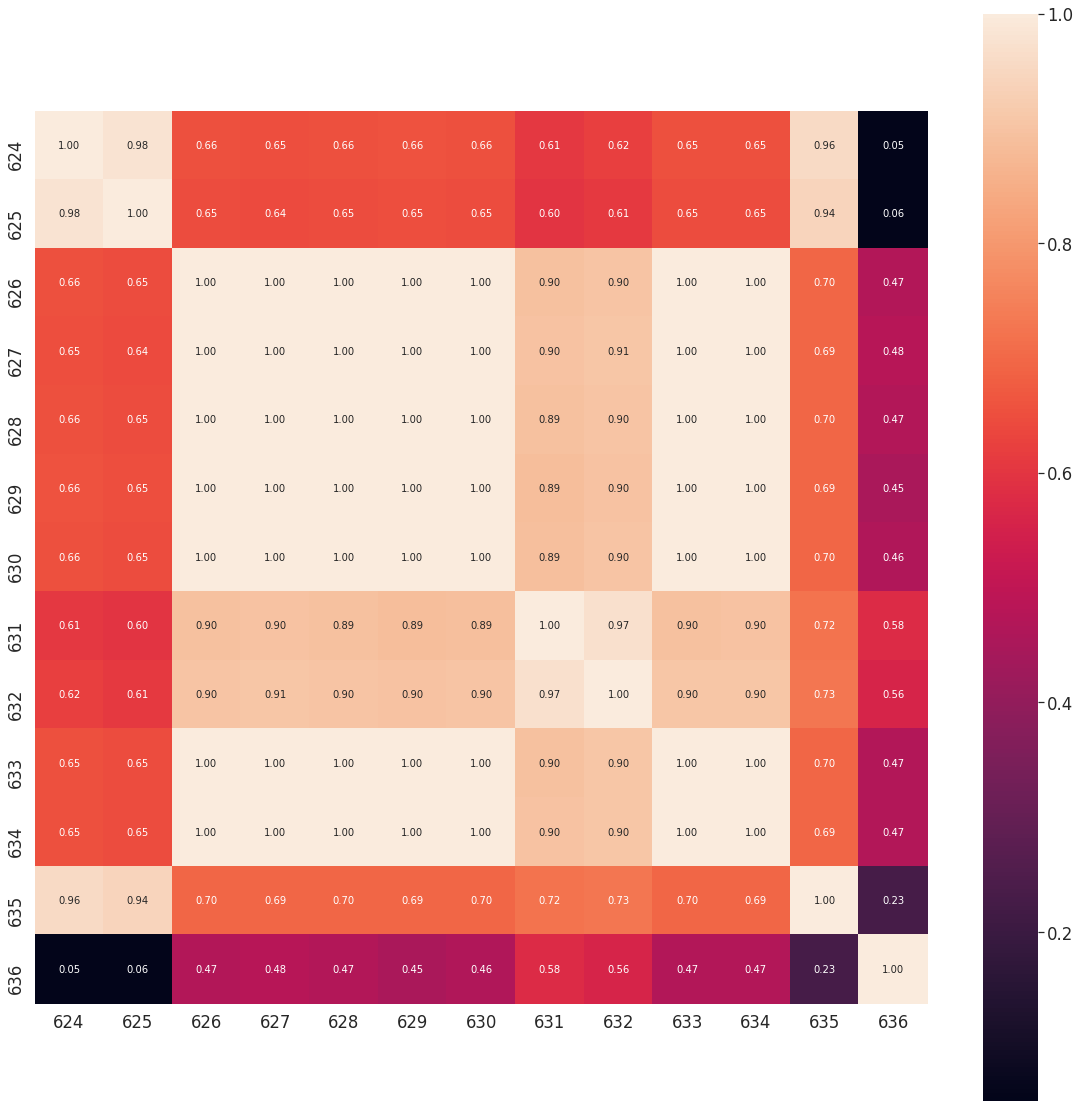

In [110]:
# 'ATM.N2.H2.' 컬럼 인덱스 리스트
col_atm = name_dict['ATM.N2.H2.']

# 데이터에서 해당 컬럼만 추출하여 저장하기
df = df_origin.iloc[:, col_atm]

# 상관계수 데이터프레임을 배열로 저장
corr_array = df.corr().to_numpy()
#print(corr_array.shape)    # (26,26)

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.set(font_scale=1.5)
sns.heatmap(corr_array, cbar=True, square=True, fmt='.2f', annot=True,
           annot_kws={'size':10}, yticklabels=col_atm, xticklabels=col_atm)
plt.show()

### 자동화


In [136]:
# 딕셔너리 키를 리스트로 저장
key_list = []
for key in name_dict.keys():
    key_list.append(key)
#key_list

In [137]:
# 키를 입력하면 해당 키에 속하는 컬럼간 상관계수 히트맵 그려주는 함수 생성
def make_heatmap(key):
    # 컬럼 인덱스 리스트
    col_atm = name_dict[key]

    # 데이터에서 해당 컬럼만 추출하여 저장하기
    df = df_origin.iloc[:, col_atm]

    # 상관계수 데이터프레임을 배열로 저장
    corr_array = df.corr().to_numpy()

    plt.figure(figsize=(14,14))
    sns.set(font_scale=1.5)
    sns.heatmap(corr_array, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, yticklabels=col_atm, xticklabels=col_atm)
    plt.show()

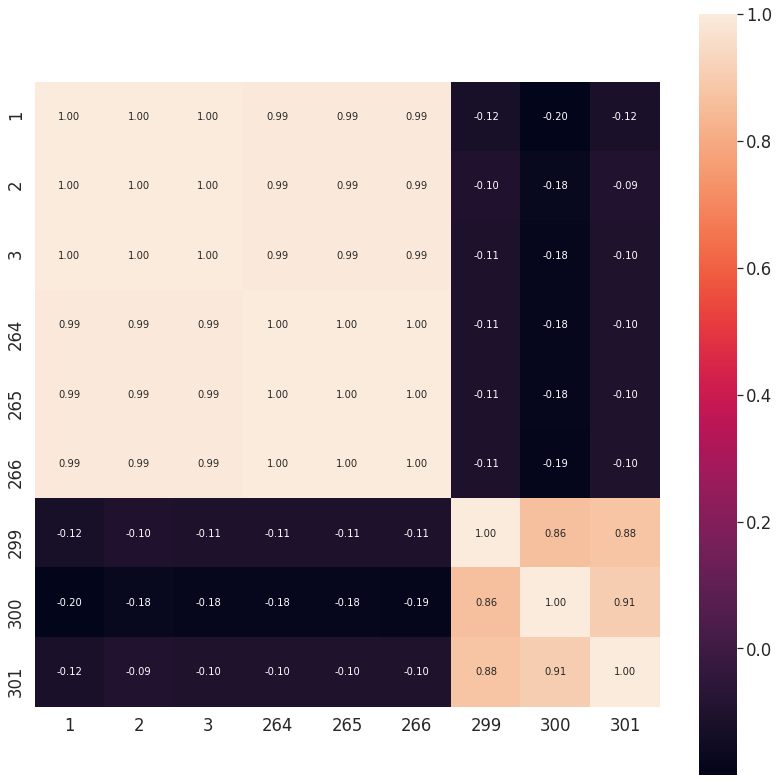

In [131]:
# make_heatmap 함수 확인
make_heatmap('LIFT.OUT.R')

In [139]:
# 상관계수가 